# Import data from web scrawlers

Here we first build a web scrawler to scrap all the trafic information from the official twitter accounts of RATP, SNCF 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ---- Summary of the twitter accounts -----#
# RER_A
# RERB
# RERC_SNCF --< Infotrafic
# RERD_SNCF --< Infotrafic
# RERE_SNCF --< Infotrafic
# Ligne12_RATP --< from 1 to 14 lines

line_list = ['RER_A', 'RER_B', 'RER_C', 'RER_D', 'RER_E','Ligne1_RATP', 'Ligne2_RATP', 'Ligne3_RATP', 'Ligne4_RATP',
 'Ligne5_RATP', 'Ligne6_RATP', 'Ligne7_RATP', 'Ligne8_RATP', 'Ligne9_RATP', 'Ligne10_RATP', 'Ligne11_RATP', 'Ligne12_RATP',
 'Ligne13_RATP', 'Ligne14_RATP' ]

file_path = "data/"
line_dict = dict()
for item in line_list:
    line_dict[item] = pd.read_csv(file_path + item +'.csv', sep=';',error_bad_lines=False) 

b'Skipping line 4313: expected 10 fields, saw 11\n'
b'Skipping line 1089: expected 10 fields, saw 11\nSkipping line 4918: expected 10 fields, saw 11\nSkipping line 7193: expected 10 fields, saw 11\n'
b'Skipping line 11823: expected 10 fields, saw 11\nSkipping line 12791: expected 10 fields, saw 11\nSkipping line 17202: expected 10 fields, saw 11\nSkipping line 17564: expected 10 fields, saw 11\nSkipping line 17567: expected 10 fields, saw 11\nSkipping line 17835: expected 10 fields, saw 11\nSkipping line 17848: expected 10 fields, saw 11\nSkipping line 18418: expected 10 fields, saw 11\nSkipping line 18430: expected 10 fields, saw 11\nSkipping line 18509: expected 10 fields, saw 11\nSkipping line 18599: expected 10 fields, saw 11\nSkipping line 18880: expected 10 fields, saw 11\nSkipping line 18920: expected 10 fields, saw 11\nSkipping line 19707: expected 10 fields, saw 11\n'
b'Skipping line 4081: expected 10 fields, saw 11\nSkipping line 10409: expected 10 fields, saw 11\nSkipping li

# First, have a look at the data

In [2]:
line_dict['RER_A'].sort_values(by='retweets',ascending = False).head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink
2987,RER_A,2017-05-24 12:41,1996,416,"Ce chien a été retrouvé ce matin, vers 7h, sur...",NaN,NaN,#RERA,8.673298e+17,https://twitter.com/RER_A/status/8673297646919...
107,RER_A,2017-10-05 17:52,429,145,1 incident électrique au niveau de la caténair...,NaN,NaN,#RERA,9.159679e+17,https://twitter.com/RER_A/status/9159679468995...
784,RER_A,2017-08-28 12:02,342,409,[ #TravauxEteRERA ] Les travaux sont terminés ...,NaN,NaN,#TravauxEteRERA #RERA,9.021090e+17,https://twitter.com/RER_A/status/9021090016257...
16061,RER_A,2015-01-29 06:23,306,19,Arrêt de travail spontané en raison de l'agres...,NaN,NaN,#RERA,5.606696e+17,https://twitter.com/RER_A/status/5606696327600...
16046,RER_A,2015-01-29 08:01,295,26,Depuis 7h52 fermeture des gares #RERA #RATP sa...,NaN,NaN,#RERA #RATP,5.606942e+17,https://twitter.com/RER_A/status/5606941607020...


# Check how many items in each sub data set 

In [3]:
# Check how many items we have
for k,v in line_dict.items():
    print(k, v.shape)
    #print(v.head())

RER_A (21028, 10)
RER_B (15540, 10)
RER_C (23086, 10)
RER_D (23306, 10)
RER_E (8497, 10)
Ligne1_RATP (7436, 10)
Ligne2_RATP (5518, 10)
Ligne3_RATP (5043, 10)
Ligne4_RATP (9091, 10)
Ligne5_RATP (5998, 10)
Ligne6_RATP (6977, 10)
Ligne7_RATP (5963, 10)
Ligne8_RATP (5903, 10)
Ligne9_RATP (5642, 10)
Ligne10_RATP (3950, 10)
Ligne11_RATP (3812, 10)
Ligne12_RATP (6335, 10)
Ligne13_RATP (6992, 10)
Ligne14_RATP (4927, 10)


# Have a look at the data in each sub dataset

Since RER datasets may have different patterns comparing to metros.

In [4]:
line_dict['Ligne11_RATP'].head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,Ligne11_RATP,2017-10-10 12:19,0,0,"Bonjour, la #Ligne11 fonctionne correctement, ...",NaN,NaN,#Ligne11,9.176961e+17,https://twitter.com/Ligne11_RATP/status/917696...
1,Ligne11_RATP,2017-10-09 14:22,0,1,"Demain, le trafic sera normal sur votre #ligne...",NaN,NaN,#ligne11 #RATP #greve10octobre,9.173647e+17,https://twitter.com/Ligne11_RATP/status/917364...
2,Ligne11_RATP,2017-10-08 12:58,0,1,Retour à un trafic régulier sur l'ensemble de ...,NaN,NaN,#Ligne11 #RATP,9.169811e+17,https://twitter.com/Ligne11_RATP/status/916981...
3,Ligne11_RATP,2017-10-08 12:51,1,0,"12:51, Retour à un trafic régulier sur l'ensem...",NaN,NaN,#Ligne11 #RATP,9.169795e+17,https://twitter.com/Ligne11_RATP/status/916979...
4,Ligne11_RATP,2017-10-08 12:45,1,0,"12:43, le trafic reprend progressivement (coli...",NaN,NaN,#RATP #Ligne11,9.169778e+17,https://twitter.com/Ligne11_RATP/status/916977...


In [5]:
line_dict['RER_B'].head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,RERB,2017-10-12 19:16,0,0,Toutes les missions sont rendues omnibus. Bonn...,NaN,NaN,NaN,9.185259e+17,https://twitter.com/RERB/status/91852587036885...
1,RERB,2017-10-12 18:51,1,0,"Bonsoir, le trafic reprend progressivement mai...",NaN,NaN,NaN,9.185196e+17,https://twitter.com/RERB/status/91851956429560...
2,RERB,2017-10-12 18:45,1,0,Il est également possible de prendre un train ...,NaN,NaN,NaN,9.185180e+17,https://twitter.com/RERB/status/91851797897883...
3,RERB,2017-10-12 18:40,0,0,"Bonsoir, oui des trains circulent au départ d'...",NaN,NaN,NaN,9.185168e+17,https://twitter.com/RERB/status/91851677975599...
4,RERB,2017-10-12 18:36,0,1,"Bonsoir, l'incident est terminé, le trafic rep...",NaN,NaN,NaN,9.185157e+17,https://twitter.com/RERB/status/91851566784590...


## We find a fun fact by checking data from RER_A: the most popular twitter is about a refound dog???

In [6]:
# sort by retweets --> a dog is missing??? comes up first???
line_dict['RER_A'].sort_values(by='retweets',ascending = False)['text'].head()

2987     Ce chien a été retrouvé ce matin, vers 7h, sur...
107      1 incident électrique au niveau de la caténair...
784      [ #TravauxEteRERA ] Les travaux sont terminés ...
16061    Arrêt de travail spontané en raison de l'agres...
16046    Depuis 7h52 fermeture des gares #RERA #RATP sa...
Name: text, dtype: object

# Import different station names from RATP API

In [7]:
# find all station names --> gares
df_st = pd.read_csv('data\gares.csv', delimiter=';')
gares = df_st.nomptar.str.split('(')
gares = [x[0].rstrip(' ') for x in gares] # la defense has a lagging space

# Data Cleaning:

1. Creating a data cleaning function.
2. Run the function over all datasets.

In [8]:
# change display to 200
## Step 1: delete all 
## Théo, Bonjour, @, Tom, Emma
import re
def clean_data(input):
    pd.options.display.max_colwidth = 200
    input['date'] = pd.to_datetime(input.date)
    input = input[input.date >= pd.to_datetime('2014-1-1')]
    
    # replace pte, chateau 
    input.text = input.text.str.replace('Pte|pte', 'Porte')
    input.text = input.text.str.replace('Chateau|chateau', 'Château')
    input.text = input.text.str.replace('électr.', 'électrique')
    input.text = input.text.str.replace('tvx.', 'travaux')    
    
    if re.search('RER[CDE]_SNCF',input.username.iloc[0]):
        output = input[input.text.str.contains('Infotrafic', na=False)]
    else:
        to_drop = ["Bonjour", "@",'Théo', 'Emma','Bjr','Inès',
                   'Lana','vous','soirée','Oui','estimée', 
                   'Travaux prévus','journée','bonjour','rerb', 
                   'rerc','rerd', 'rere','Infotrafic'] # all about conversations 
        output = input[~input.text.str.contains('|'.join(to_drop), na=False)]
    return output

## Check how many items left in each sub dataset.

In [9]:
for k in line_dict.keys():
    line_dict[k] = clean_data(line_dict[k])
    print(k, line_dict[k].shape)

D:\Users\ThinkPad\Anaconda3\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


RER_A (8214, 10)
RER_B (6586, 10)
RER_C (2502, 10)
RER_D (2967, 10)
RER_E (1567, 10)
Ligne1_RATP (2965, 10)
Ligne2_RATP (2221, 10)
Ligne3_RATP (2073, 10)
Ligne4_RATP (4314, 10)
Ligne5_RATP (2671, 10)
Ligne6_RATP (3439, 10)
Ligne7_RATP (2851, 10)
Ligne8_RATP (3013, 10)
Ligne9_RATP (2546, 10)
Ligne10_RATP (1345, 10)
Ligne11_RATP (1285, 10)
Ligne12_RATP (2616, 10)
Ligne13_RATP (3104, 10)
Ligne14_RATP (1786, 10)


# Using NLP to analyze tweets

1. Find the most frequent phrases
2. Find the most frequent gares
3. Find the most stations

In [10]:
# top 20 frequent words
import nltk
def words_freq(output):
    moby_tokens = nltk.word_tokenize(output.text.str.lower().str.cat(sep = ' '))
    text1 = nltk.Text(moby_tokens)
    nltk.FreqDist(text1).most_common(20)
    stopwords = nltk.corpus.stopwords.words('french')
    stopwords = stopwords + ['rera','ratp','ligne','entre',
                             'http','les','vers','dir','trafic','gare']
    words_except_stop_dist = nltk.FreqDist(w for w in text1 if w not 
                                           in stopwords and w.isalpha() )
    return words_except_stop_dist

In [11]:
from collections import Counter
def gare_fq(output):
    gare_freq = Counter()
    for gare in gares:
        gare_freq[gare] = output.text.str.lower().str.contains(gare.lower()).sum()
    return gare_freq

In [12]:
# sometimes, cergy-le-haut, naterre may be due to their direction --> 
# result is true, many items are entre XXX et XXX
line_dict['RER_A'].text[line_dict['RER_A'].text.str.contains('Cergy-Le-Haut')].sample(10)

5775                                                   20:11, la rame stationne à Lognes en dir. de Cergy-Le-Haut (incident voyageur) #RATP #RERA
17097                                      06:47, la rame est repartie de Neuilly-Plais. en dir. de Cergy-Le-Haut (incident voyageur) #RATP #RERA
2191                    En raison d'une panne de signalisation, le trafic est perturbé entre les gares Cergy-Le-Haut et Nanterre-Prefecture #RERA
8080                          16:41, le trafic est interrompu entre Nanterre-Prefecture et Cergy-Le-Haut (accident grave de voyageur) #RATP #RERA
14802                               19:11, le trafic est interrompu entre Cergy-Le-Haut et Maisons-Laffitte (incident d'exploitation) #RATP #RERA
5401                             19:52, le trafic est interrompu entre Maisons-Laffitte et Cergy-Le-Haut (accident grave de voyageur) #RATP #RERA
10570                                17:12, le trafic est interrompu entre Cergy-Le-Haut et Maisons-Laffitte (panne de signa

## Check words_freq function on RER_B

In [13]:
## Now let's try RER B
output_b = line_dict['RER_B']
words_freq(output_b).most_common(20)

[('rerb', 5417),
 ('incident', 1417),
 ('perturbé', 1111),
 ('retour', 1044),
 ('terminé', 963),
 ('régulier', 921),
 ('voyageur', 861),
 ('aeroport', 688),
 ('colis', 678),
 ('suspect', 676),
 ('nord', 663),
 ('interrompu', 651),
 ('cdg', 631),
 ('panne', 555),
 ('ralenti', 476),
 ('mitry', 451),
 ('train', 446),
 ('robinson', 432),
 ('claye', 401),
 ('charles', 381)]

## Check gare_fq function on RER_B

In [14]:
gare_fq(output_b).most_common(20)

[('Gare du Nord', 584),
 ('Robinson', 464),
 ('Palaiseau', 225),
 ('Les Halles', 213),
 ('Antony', 144),
 ('Bourg-la-Reine', 112),
 ('Mitry-Claye', 106),
 ('Châtelet', 98),
 ('Laplace', 90),
 ('Massy-Palaiseau', 84),
 ('Luxembourg', 83),
 ('Aulnay-sous-Bois', 65),
 ('Parc des Expositions', 60),
 ('Le Bourget', 57),
 ('Port Royal', 52),
 ('Cité', 41),
 ('La Plaine-Stade de France', 31),
 ('Orsay-Ville', 31),
 ('Denfert-Rochereau', 30),
 ('Sceaux', 29)]

## Build incident_freq function

In [15]:
from collections import Counter
def incidient_reason(input):
    output = input
    incidents = ['malaise voyageur',"incident d'exploitation","incident technique",'Incident de signalisation',
                "colis suspect", "voyageur malade", "incident voyageur", 
                "divers incidents",'panne de signalisation','panne de matériel',
                'panne électrique','panne mécanique','panne de caténaire',
                "panne d'aiguillage",'panne matériel','panne éléctrique', 
                'panne sur un train','pannes de signalisation',"panne d'un train",
                "panne de train",'obstacle sur la voie', 'bagage abandonné','incident de passage', 
                 'accident de personne','feu aux abords','pb signalisation','acte de malveillance',
                 'jets de pierre','obstacle sur la voie','bagage oublié',
                 'personnes sur les voies','branche tombée','jet de projectile']
    incident_freq = Counter()
    for incident in incidents:
        incident_freq[incident] = output.text.str.lower().str.contains(incident.lower()).sum()
    return incident_freq   

## Test incident_reason function in RER_C

In [16]:
incidient_reason(line_dict['RER_C']).most_common()

[('bagage abandonné', 149),
 ('bagage oublié', 144),
 ('personnes sur les voies', 113),
 ("panne d'un train", 103),
 ('accident de personne', 78),
 ('malaise voyageur', 25),
 ('Incident de signalisation', 24),
 ('acte de malveillance', 24),
 ('obstacle sur la voie', 15),
 ('incident technique', 11),
 ('incident de passage', 9),
 ('feu aux abords', 8),
 ('branche tombée', 8),
 ('panne électrique', 6),
 ('jets de pierre', 5),
 ('panne de signalisation', 4),
 ('colis suspect', 3),
 ('panne sur un train', 3),
 ('pb signalisation', 3),
 ('jet de projectile', 3),
 ('incident voyageur', 2),
 ("panne d'aiguillage", 2),
 ('divers incidents', 1),
 ('panne de train', 1),
 ("incident d'exploitation", 0),
 ('voyageur malade', 0),
 ('panne de matériel', 0),
 ('panne mécanique', 0),
 ('panne de caténaire', 0),
 ('panne matériel', 0),
 ('panne éléctrique', 0),
 ('pannes de signalisation', 0)]

## Consolidate all functions in one dashboard function

In [17]:
# what if we write a summary function 
def summary(input):
    output = input
    print()
    print ('The 20 most frequent words are: ')
    print(words_freq(output).most_common(20))
    print('\n')
    print('The 20 most frequent stations are: ')
    print(gare_fq(output).most_common(20))
    print('\n')
    print('The 20 most frequent reasons are: ')
    print(incidient_reason(output).most_common(20))
#summary(line_dict['RER_A'])

# Get an overview of all sub datasets

In [18]:
# Then get a global view !!!
'''
for k, v in line_dict.items():
    try:
        print(k,'\n')
        summary(v)
    except:
        print('Something is wrong')
        pass
'''

"\nfor k, v in line_dict.items():\n    try:\n        print(k,'\n')\n        summary(v)\n    except:\n        print('Something is wrong')\n        pass\n"

# Merge all sub datasets into one 

In [19]:
# concat all dataframe and clean data
def consol(data_dic):
    result = pd.DataFrame()
    for k, v in data_dic.items():
        result = pd.concat([result, v])
    result = result.sort_values(by='date')
    return result
df_consol = consol(line_dict)

In [20]:
# overall summary
#summary(df_consol)

## How many tweets per Ligne/RER

In [21]:
# overall tweets
df_consol.username.value_counts()

RER_A           8214
RERB            6586
Ligne4_RATP     4314
Ligne6_RATP     3439
Ligne13_RATP    3104
Ligne8_RATP     3013
RERD_SNCF       2967
Ligne1_RATP     2965
Ligne7_RATP     2851
Ligne5_RATP     2671
Ligne12_RATP    2616
Ligne9_RATP     2546
RERC_SNCF       2502
Ligne2_RATP     2221
Ligne3_RATP     2073
Ligne14_RATP    1786
RERE_SNCF       1567
Ligne10_RATP    1345
Ligne11_RATP    1285
Name: username, dtype: int64

# Numbers of Tweets per day

In [22]:
date_tweets = df_consol.date.apply(lambda x: x.date()).value_counts()
date_tweets.iloc[:10]

2015-01-29    278
2016-12-06    166
2015-06-30    161
2014-12-31    154
2017-06-24    144
2016-11-29    142
2016-08-14    134
2016-05-25    133
2016-03-29    129
2016-12-07    120
Name: date, dtype: int64

## Plot a chart visualize the data

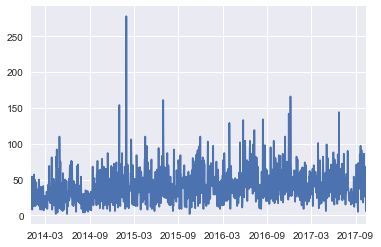

In [23]:
from matplotlib import pyplot as plt
%matplotlib inline
date_tweets.plot()

## Export date, username, tweets count per date & consolidated data

In [24]:
# export date, username, tweets count
df_consol['date_new'] =  df_consol.date.apply(lambda x: x.date())
df_consol.groupby(['date_new', 'username']).size().to_csv('tweets_date.csv')
df_consol.to_csv('consol.csv')

## Consolidate the data by hour

In [25]:
df_consol['hour'] = df_consol.date.apply(lambda x: x.hour)
df_consol.groupby(['hour','username']).size().to_csv('date_hour.csv')
df_consol.sort_values(by='retweets',ascending = False).head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,date_new,hour
5167,RERB,2016-08-20 00:15:00,1100,286,Alerte enlèvement 19.08.2016 pic.twitter.com/Glqtxno04Q,NaN,NaN,NaN,7.667604e+17,https://twitter.com/RERB/status/766760426562519040,2016-08-20,0
630,Ligne11_RATP,2016-04-01 07:54:00,667,410,"Ds une volonté de modernisation, la #RATP modifie le nom de la station Télégraphe en #Tweet http://www. ratp.fr/fr/ratp/v_1490 39/metro-rer-la-ratp-renomme-13-stations/ … pic.twitter.com/W3x8Np6pR9",NaN,NaN,#RATP #Tweet,7.157795e+17,https://twitter.com/Ligne11_RATP/status/715779457173364737,2016-04-01,7
1157,Ligne2_RATP,2016-04-01 07:51:00,470,258,2 ǝuƃıl ǝɹʇoʌ ɹns sɹǝʌuɐ uoıʇɐʇs ɐl ǝp ıpǝɹpuǝʌ ǝɔ uoıʇɐɹnƃnɐuı http://www. ratp.fr/fr/ratp/v_1490 39/metro-rer-la-ratp-renomme-13-stations/ … pic.twitter.com/ekm1oychl4,NaN,NaN,NaN,7.157786e+17,https://twitter.com/Ligne2_RATP/status/715778636557783040,2016-04-01,7
107,RER_A,2017-10-05 17:52:00,429,145,"1 incident électriqueque au niveau de la caténaire s'est produit à La Défense, bruyant, ms ss danger pour les voyageurs. Trafic perturbé #RERA",NaN,NaN,#RERA,9.159679e+17,https://twitter.com/RER_A/status/915967946899562500,2017-10-05,17
328,Ligne4_RATP,2017-08-01 15:10:00,366,192,"La station Château Rouge rouvre aujourd'hui avec une salle d'accueil + spacieuse, un nouvel accès... ! #Ligne4 http:// ow.ly/XQnv30e4FPy pic.twitter.com/DrcL2GM9K7",NaN,NaN,#Ligne4,8.923720e+17,https://twitter.com/Ligne4_RATP/status/892371982330851329,2017-08-01,15


## Export Tweets Number, Incident Reason, and Ligne/RER

In [26]:
df_incident = pd.DataFrame()
#.from_dict(incidient_reason(line_dict['RER_C']).most_common())
for k, v in line_dict.items():
    print(k,'\n')
    df_inter = pd.DataFrame.from_dict(incidient_reason(v).most_common())
    df_inter['username'] = k
    df_incident = pd.concat([df_incident, df_inter])
df_incident.sort_values(by=1, ascending = False).head()

RER_A 

RER_B 

RER_C 

RER_D 

RER_E 

Ligne1_RATP 

Ligne2_RATP 

Ligne3_RATP 

Ligne4_RATP 

Ligne5_RATP 

Ligne6_RATP 

Ligne7_RATP 

Ligne8_RATP 

Ligne9_RATP 

Ligne10_RATP 

Ligne11_RATP 

Ligne12_RATP 

Ligne13_RATP 

Ligne14_RATP 



,0,1,username
0,colis suspect,1171,RER_A
0,colis suspect,699,Ligne4_RATP
0,colis suspect,676,RER_B
0,incident technique,476,Ligne1_RATP
1,malaise voyageur,471,RER_A


## Then we find out that a few incidents should be classified in a same group

In [27]:
df_incident['group'] = df_incident.iloc[:,0]
rep = {'bagage oublié':'bagage abandonné', 'colis suspect':'bagage abandonné',
       'voyageur malade':'malaise voyageur',
       'pb signalisation':'panne de signalisation', 'jets de pierre':'acte de malveillance',
       'jets de pierre':'acte de malveillance','jet de projectile':'acte de malveillance'}
df_incident.group = df_incident.group.replace(rep)
df_incident.loc[df_incident[0].str.contains('bagage', na=False)].head()
df_incident.to_csv('df_incident.csv')

# Build a table for Machie Learning Algorithm

1. Import temperature data.
2. Import French holidays data.

In [28]:
df_temp = pd.read_csv('data/temperature.csv')
df_temp.head()
fil = ['Date','T_avg','V_avg','W_avg', 'rain','fog','snow','Thunderstorms']
df_temp_fil = df_temp[fil]
df_temp_fil.head()

,Date,T_avg,V_avg,W_avg,rain,fog,snow,Thunderstorms
0,2012/1/1,13,10,19,1,0,1,0
1,2012/1/2,8,9,18,1,1,0,0
2,2012/1/3,9,10,24,1,0,0,0
3,2012/1/4,8,10,19,0,0,0,0
4,2012/1/5,10,9,32,1,0,0,0


In [64]:
# build another conslidated dataframe, and forecast the reason
def df_class(input):
    incidents = ['malaise voyageur',"incident d'exploitation","incident technique",
                 'Incident de signalisation',
                "colis suspect", "voyageur malade", "incident voyageur", 
                "divers incidents",'panne de signalisation','panne de matériel',
                'panne électrique','panne mécanique','panne de caténaire',
                "panne d'aiguillage",'panne matériel','panne éléctrique', 
                'panne sur un train','pannes de signalisation',"panne d'un train",
                "panne de train",'obstacle sur la voie', 'bagage abandonné','incident de passage', 
                 'accident de personne','feu aux abords','pb signalisation','acte de malveillance',
                 'jets de pierre','obstacle sur la voie','bagage oublié',
                 'personnes sur les voies','branche tombée','jet de projectile',
                'grave de voyageur','animal sur la voie','défaut électrique',
                 'fin tardive de chantier',"Défaut d'alimentation électrique"]
    # clean data
    input = df_consol
    output = clean_data(input)          
    output = input[input.text.str.contains('|'.join(incidents),na=False)]
    filt = "(malaise voyageur|incident d'exploitation|incident technique|Incident de signalisation|colis suspect|voyageur malade|incident voyageur|divers incidents|panne de signalisation|panne de matériel|panne électrique|panne mécanique|panne de caténaire|panne d'aiguillage|panne matériel|panne éléctrique|panne sur un train|pannes de signalisation|panne d'un train|panne de train|obstacle sur la voie|bagage abandonné|incident de passage|accident de personne|feu aux abords|pb signalisation|acte de malveillance|jets de pierre|obstacle sur la voie|bagage oublié|personnes sur les voies|branche tombée|jet de projectile|grave de voyageur|animal sur la voie|défaut électrique|fin tardive de chantier|Défaut d'alimentation électrique)"
    output['reason'] = output.text.str.extract(filt)
    filt2 = ['username','date_new','reason']
    output = output[filt2]
    output.date_new = pd.to_datetime(output.date_new)
    df_temp_fil.Date = pd.to_datetime(df_temp_fil.Date)
    output = output.merge(right=df_temp_fil, how='inner', left_on='date_new', right_on='Date')
    output['Quarter'] = output.date_new.apply(lambda x: pd.to_datetime(x).quarter)
    output['Month'] = output.date_new.apply(lambda x: pd.to_datetime(x).day)
    output['Year'] = output.date_new.apply(lambda x: pd.to_datetime(x).year)
    output = output.drop(['date_new','Date'], axis=1)
    rep = {'bagage oublié':'bagage abandonné', 'colis suspect':'bagage abandonné',
       'voyageur malade':'malaise voyageur',  "Défaut d'alimentation électrique":'panne électrique',
        "panne d'un train":'panne de train','grave de voyageur':'incident voyageur',
           'Incident de signalisation':'pannes de signalisation',
           'panne de matériel':'panne matériel',
           'panne sur un train':'panne de train',
           'pb signalisation':'panne de signalisation', 'jets de pierre':'acte de malveillance',
       'jets de pierre':'acte de malveillance','jet de projectile':'acte de malveillance',
          'accident de personne':'incident voyageur','malaise voyageur':'incident voyageur',
           'pannes de signalisation':'panne de signalisation'}
    output.reason = output.reason.replace(rep)    
    output = output[output.T_avg != '-']
    output = output[output.V_avg != '-']   
    return output


### Remember that we built a consolidated before, let's review this dataframe. 

In [58]:
df_consol.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,date_new,hour
5754,Ligne6_RATP,2014-01-01 03:09:00,1,0,Fin de la manifestation impactant la ligne #Ligne6 .,NaN,NaN,#Ligne6,4.182022e+17,https://twitter.com/Ligne6_RATP/status/418202249354289152,2014-01-01,3
4606,Ligne9_RATP,2014-01-01 03:09:00,0,0,"03:09, Le trafic est de nouveau normal sur l'ensemble de la ligne #Ligne9 . #RATP",NaN,NaN,#Ligne9 #RATP,4.182023e+17,https://twitter.com/Ligne9_RATP/status/418202256325238784,2014-01-01,3
4605,Ligne9_RATP,2014-01-01 03:09:00,0,0,Fin de la manifestation impactant la ligne #Ligne9 .,NaN,NaN,#Ligne9,4.182023e+17,https://twitter.com/Ligne9_RATP/status/418202266920050688,2014-01-01,3
5049,Ligne8_RATP,2014-01-01 06:52:00,1,0,"06:49, le trafic est interrompu entre Maisons-Alfort-Les Juilliottes et Pointe du Lac (voyageur sur la voie) #RATP #Ligne8",NaN,NaN,#RATP #Ligne8,4.182584e+17,https://twitter.com/Ligne8_RATP/status/418258368995024897,2014-01-01,6
5048,Ligne8_RATP,2014-01-01 07:07:00,0,0,"07:05, le trafic reprend progressivement sur la ligne (voyageur sur la voie) #RATP #Ligne8",NaN,NaN,#RATP #Ligne8,4.182621e+17,https://twitter.com/Ligne8_RATP/status/418262143814090752,2014-01-01,7


D:\Users\ThinkPad\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
D:\Users\ThinkPad\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Users\ThinkPad\Anaconda3\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [39]:
#merge data
output.date_new = pd.to_datetime(output.date_new)
output = output.merge(right=df_temp_fil, how='inner', left_on='date_new', right_on='Date')




,username,reason,T_avg,V_avg,W_avg,rain,fog,snow,Thunderstorms,Quarter,Month,Year


## Split the dataset into X_train, X_test, y_train, y_test

In [65]:
# let's run classification
from sklearn.model_selection import train_test_split
X = df_class(df_consol).drop('reason', axis=1)

D:\Users\ThinkPad\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
D:\Users\ThinkPad\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Users\ThinkPad\Anaconda3\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


## Check X data

In [66]:
X.head()

,username,T_avg,V_avg,W_avg,rain,fog,snow,Thunderstorms,Quarter,Month,Year
0,Ligne9_RATP,8,10,21,1,0,0,0,1,1,2014
1,Ligne9_RATP,8,10,21,1,0,0,0,1,1,2014
2,RER_A,10,10,27,1,0,0,0,1,2,2014
3,RERB,10,10,27,1,0,0,0,1,2,2014
4,RERB,10,10,27,1,0,0,0,1,2,2014


In [67]:
X.T_avg = pd.to_numeric(X.T_avg)
X.V_avg = pd.to_numeric(X.V_avg)
X.W_avg = pd.to_numeric(X.W_avg)
X = pd.get_dummies(X)
y = df_class(df_consol).reason
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

D:\Users\ThinkPad\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
D:\Users\ThinkPad\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Users\ThinkPad\Anaconda3\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


# Run different models

1. KNN
2. RandomForest
3. AdaBoost

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)

ValueError: multiclass format is not supported

In [80]:
y_predicted

array(['panne de signalisation', 'bagage abandonné', 'panne électrique',
       ..., 'bagage abandonné', 'bagage abandonné', 'incident technique'], dtype=object)

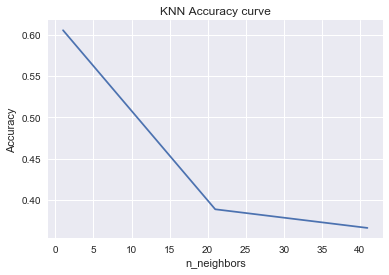

Accuracy is 0.6056046642843709
Best parameter is n = 1
F1 score is 0.6058051709035043


In [106]:
import seaborn as sns
plt.figure()
scores = []
for n in range(1,50,20):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_scaled, y_train)
    scores.append(knn.score(X_test_scaled, y_test))
plt.plot(range(1,50,20), scores)
plt.title('KNN Accuracy curve')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()  
acc_knn = max(scores)
n_knn = list(range(1,50,20))[scores.index(max(scores))]

# 
knn = KNeighborsClassifier(n_neighbors=n_knn)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
f1_knn = f1_score(y_test, y_pred, average = 'weighted')
print('Accuracy is {}'.format(acc_knn))
print('Best parameter is n = {}'.format(n_knn))
print('F1 score is {}'.format(f1_knn))

In [102]:
list(range(1,50,20))

[1, 21, 41]

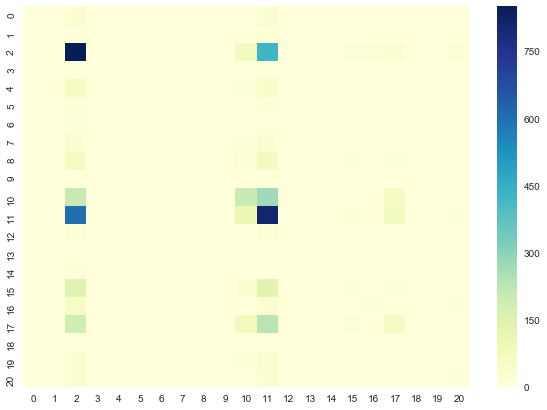

In [82]:
from sklearn.metrics import confusion_matrix
y_predicted = knn.predict(X_test_scaled)
confusion = confusion_matrix(y_test, y_predicted)
import seaborn as sns
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(confusion)
#sns.set(font_scale=1.4)#for label size
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, cmap="YlGnBu")# font size

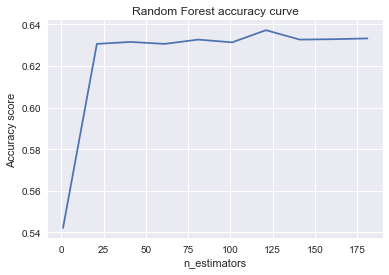

Accuracy is 0.6372014293774685
Best parameter is n = 121
F1 score is 0.6265875031647756


D:\Users\ThinkPad\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import auc, roc_auc_score, accuracy_score, f1_score
scores = []
for n in range(1,200,20):    
    forest = RandomForestClassifier(n_estimators=n)
    forest.fit(X_train_scaled, y_train)
    y_pred = forest.predict(X_test_scaled)
    scores.append(accuracy_score(y_test, y_pred))
    #print(score)
plt.plot(range(1,200,20), scores)
plt.title('Random Forest accuracy curve')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy score')
plt.show()  

acc_forest = max(scores)
n_forest = list(range(1,200,20))[scores.index(max(scores))]
# 
forest = RandomForestClassifier(n_estimators=n_forest)
forest.fit(X_train_scaled, y_train)
y_pred = forest.predict(X_test_scaled)
f1_forest = f1_score(y_test, y_pred, average = 'weighted')
print('Accuracy is {}'.format(acc_forest))
print('Best parameter is n = {}'.format(n_forest))
print('F1 score is {}'.format(f1_forest))

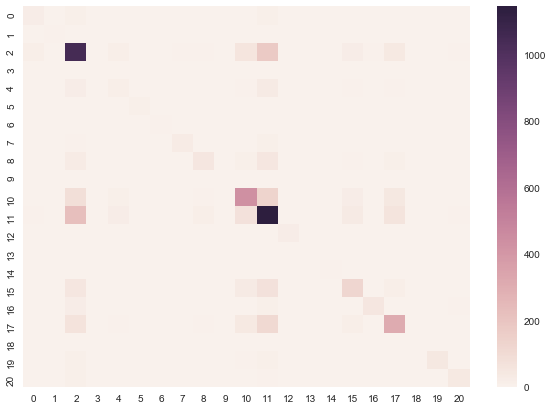

In [92]:
from sklearn.metrics import confusion_matrix
y_predicted = forest.predict(X_test_scaled)
confusion = confusion_matrix(y_test, y_predicted)
df_cm = pd.DataFrame(confusion)
#sns.set(font_scale=1.4)#for label size
plt.figure(figsize = (10,7))
sns.heatmap(df_cm)# font size

In [96]:
boost = AdaBoostClassifier()
boost.fit(X_train_scaled, y_train)
y_pred = boost.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.32781643784088771

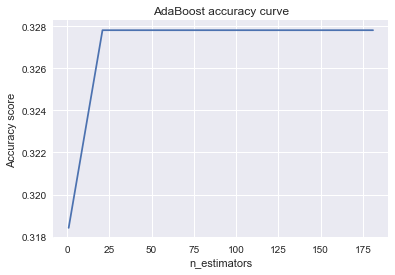

Accuracy is 0.3278164378408877
Best parameter is n = 21
F1 score is 0.21829487705961162


D:\Users\ThinkPad\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [110]:
from sklearn.ensemble import AdaBoostClassifier
scores = []
for n in range(1,200,20):    
    boost = AdaBoostClassifier(n_estimators=n)
    boost.fit(X_train_scaled, y_train)
    y_pred = boost.predict(X_test_scaled)
    scores.append(accuracy_score(y_test, y_pred))
    #print(score)
plt.plot(range(1,200,20), scores)
plt.title('AdaBoost accuracy curve')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy score')
plt.show()  

acc_boost = max(scores)
n_boost = list(range(1,200,20))[scores.index(max(scores))]
# 
boost = AdaBoostClassifier(n_estimators=n_boost)
boost.fit(X_train_scaled, y_train)
y_pred = boost.predict(X_test_scaled)
f1_boost = f1_score(y_test, y_pred, average = 'weighted')
print('Accuracy is {}'.format(acc_boost))
print('Best parameter is n = {}'.format(n_boost))
print('F1 score is {}'.format(f1_boost))

In [111]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train_scaled, y_train)
y_pred = tree.predict(X_test_scaled)
acc_tree = accuracy_score(y_test, y_pred)
f1_tree = f1_score(y_test, y_pred, average = 'weighted')
print('Accuracy is {}'.format(accuracy_score(y_test, y_pred)))
print('F1 score is {}'.format(f1_score(y_test, y_pred, average = 'weighted')))

Accuracy is 0.6197103629866466
F1 score is 0.6163041359918537


D:\Users\ThinkPad\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [117]:
l_svc = LinearSVC()
l_svc.fit(X_train_scaled, y_train)
y_pred = l_svc.predict(X_test_scaled)
f1_svc = f1_score(y_test, y_pred, average = 'weighted')


D:\Users\ThinkPad\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


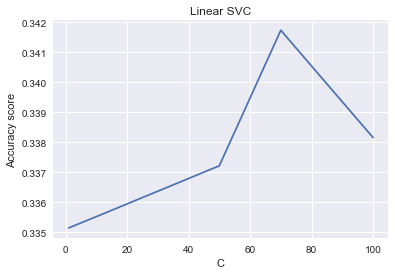

Accuracy is 0.3417340605604664
Best parameter is c = 70
F1 score is 0.2602133320421949


D:\Users\ThinkPad\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [122]:
from sklearn.svm import LinearSVC
import numpy as np
scores = []
rng = [1,10,50,70,100]
for c in rng:    
    l_svc = LinearSVC(C=c)
    l_svc.fit(X_train_scaled, y_train)
    y_pred = l_svc.predict(X_test_scaled)
    scores.append(accuracy_score(y_test, y_pred))
    #print(score)
plt.plot(rng, scores)
plt.title('Linear SVC')
plt.xlabel('C')
plt.ylabel('Accuracy score')
plt.show()  
acc_svc = max(scores)
c_svc = rng[scores.index(max(scores))]
# 
l_svc = LinearSVC(C=c_svc)
l_svc.fit(X_train_scaled, y_train)
y_pred = l_svc.predict(X_test_scaled)
f1_svc = f1_score(y_test, y_pred, average = 'weighted')
print('Accuracy is {}'.format(acc_svc))
print('Best parameter is c = {}'.format(c_svc))
print('F1 score is {}'.format(f1_svc))

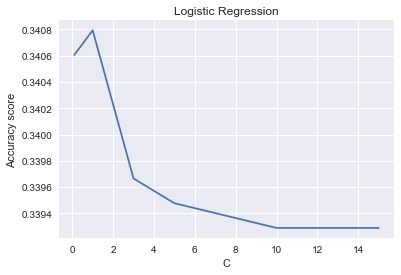

Accuracy is 0.3407936806469814
Best parameter is c = 1
F1 score is 0.28725673438287525


D:\Users\ThinkPad\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Users\ThinkPad\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [124]:
from sklearn.linear_model import LogisticRegression
import numpy as np
scores = []
rng = [0.1,1,3,5,10,15]
for c in rng:    
    lr = LogisticRegression(C=c)
    lr.fit(X_train_scaled, y_train)
    y_pred = lr.predict(X_test_scaled)
    scores.append(accuracy_score(y_test, y_pred))
    #print(score)
plt.plot(rng, scores)
plt.title('Logistic Regression')
plt.xlabel('C')
plt.ylabel('Accuracy score')
plt.show()  
acc_lr = max(scores)
c_lr = rng[scores.index(max(scores))]
# 
lr = LinearSVC(C=c_svc)
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)
f1_lr = f1_score(y_test, y_pred, average = 'weighted')
print('Accuracy is {}'.format(acc_lr))
print('Best parameter is c = {}'.format(c_lr))
print('F1 score is {}'.format(f1_lr))

In [126]:
models = pd.DataFrame({
    'Model': ['Linear SVC', 'KNN', 'Random Forest', 'AdaBoost', 
              'Logistic Regression', 'Decision Tree'],
    'Score': [acc_svc,acc_knn, acc_forest, acc_boost, 
              acc_lr, acc_tree],
    'F1 Score':[f1_svc, f1_knn, f1_forest, f1_boost, 
               f1_lr, f1_tree]})

models.sort_values(by='Score', ascending=False)

,F1 Score,Model,Score
2,0.626588,Random Forest,0.637201
5,0.616304,Decision Tree,0.619710
1,0.605805,KNN,0.605605
0,0.260213,Linear SVC,0.341734
4,0.287257,Logistic Regression,0.340794
3,0.218295,AdaBoost,0.327816


In [127]:
'''from sklearn.metrics import confusion_matrix
y_predicted = boost.predict(X_test_scaled)
confusion = confusion_matrix(y_test, y_predicted)
df_cm = pd.DataFrame(confusion)
#sns.set(font_scale=1.4)#for label size
plt.figure(figsize = (10,7))
sns.heatmap(df_cm)# font size
'''

'from sklearn.metrics import confusion_matrix\ny_predicted = boost.predict(X_test_scaled)\nconfusion = confusion_matrix(y_test, y_predicted)\ndf_cm = pd.DataFrame(confusion)\n#sns.set(font_scale=1.4)#for label size\nplt.figure(figsize = (10,7))\nsns.heatmap(df_cm)# font size\n'

In [ ]:
X.head()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import time
tic = time.time()
knn = KNeighborsClassifier(1)
knn.fit(X_train_scaled, y_train)
score = knn.score(X_test_scaled, y_test)
toc = time.time()
print(toc - tic)
print(score)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
grid_values = {'n_neighbors':[i for i in range(1, 20, 2)]}
knn = KNeighborsClassifier()
grid_acc = GridSearchCV(knn, param_grid = grid_values)
grid_acc.fit(X_train_scaled, y_train)
print('Grid best socre:', grid_acc.best_score_)
print ('Grid best para', grid_acc.best_params_)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train_scaled, y_train)
forest.score(X_test_scaled, y_test)


In [ ]:
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score
y_predicted = forest.predict(X_test_scaled)
print('F1 socre is {:.3f}'.format(f1_score(y_test, y_predicted, average ='weighted')))
print('Accuracy is {:.3f}'.format(accuracy_score(y_test, y_predicted)))
#print('AUC is {:.3f}'.format(roc_auc_score(y_test, y_predicted, average = 'weighted')))


In [ ]:
"""# draw a roc_curve, knn does not know how to do
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
forest = OneVsRestClassifier(RandomForestClassifier())
forest.fit(X_train_scaled, y_train)
y_score = forest.predict_proba(X_test_scaled)[:,1]
fpr, tpr, _ = roc_curve(y_test[:,1], y_score)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.00])
plt.plot(fpr, tpr, lw=3, label='ROC curve (area={:0.2f})'.format(roc_auc))
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0,1], color='navy', lw=3, linestyle = '--')
plt.show()"""


In [ ]:
y.unique()

In [ ]:
X.to_csv("data.csv")
y.to_csv('label.csv')

In [ ]:
X.head()

In [ ]:
df_consol.head()